<a href="https://colab.research.google.com/github/shakhawat17/Data-Science/blob/main/Assignment_6_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install required libraries

In [1]:
!pip install scikit-learn matplotlib pandas


# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


#Load Dataset
# Breast Cancer dataset

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
from google.colab import files
import pandas as pd


In [5]:
uploaded = files.upload()

Saving Breast_Cancer_Wisconsin_Dataset.csv to Breast_Cancer_Wisconsin_Dataset.csv


In [7]:
df = pd.read_csv("Breast_Cancer_Wisconsin_Dataset.csv")

In [8]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [10]:
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Question 1: Find the Best Tree Depth

In [12]:
depths = [2, 3, 4, 5]
accuracy_results = {}

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_results[d] = acc
    print(f"Depth {d}: Accuracy = {acc:.4f}")

Depth 2: Accuracy = 0.9211
Depth 3: Accuracy = 0.9211
Depth 4: Accuracy = 0.9035
Depth 5: Accuracy = 0.9386


# Find best depth

In [13]:
best_depth = max(accuracy_results, key=accuracy_results.get)
print("\nBest Depth:", best_depth, "with Accuracy:", accuracy_results[best_depth])


Best Depth: 5 with Accuracy: 0.9385964912280702


# Question 2: Calculate All Metrics

In [15]:
best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

precision = precision_score(y_test, y_pred_best, pos_label='M')
recall = recall_score(y_test, y_pred_best, pos_label='M')
f1 = f1_score(y_test, y_pred_best, pos_label='M')

print("\nMetrics with Best Depth:")
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))


Metrics with Best Depth:
Precision: 0.973
Recall: 0.8571
F1 Score: 0.9114


# Optional detailed classification report

In [16]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


Classification Report:
               precision    recall  f1-score   support

           B       0.92      0.99      0.95        72
           M       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



# Question 3: Test on New Patients

# Let's simulate testing on 3 new patients (taking random samples from X_test)

In [17]:
new_patients = X_test[:3]
new_predictions = best_model.predict(new_patients)

print("\nPredictions for New Patients:")
for i, pred in enumerate(new_predictions, 1):
    diagnosis = "Malignant" if pred == 0 else "Benign"
    print(f"Patient {i}: {diagnosis}")


Predictions for New Patients:
Patient 1: Benign
Patient 2: Benign
Patient 3: Benign


# Question 4: Analyze Confusion Matrix

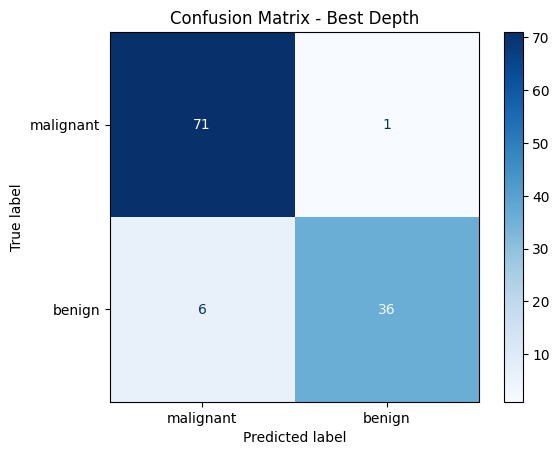

In [18]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best Depth")
plt.show()